# Funnest Neighborhood - CMPINF0010 FINAL PROJECT

![gif](https://media.giphy.com/media/4dL4eV4pNb3MY/giphy.gif)

In this analysis to determine the "best" Pittsburgh Neighborhood, we looked amongst multiple datasets regarding parks and recreation facilities in Pittsburgh's multiple communities to determine which neighborhood was the most appealing towards outdoor fun. To achieve this, we decided to look at multiple metrics we thought we would want if we were to decide which neighborhood to live in. A major part of a community is having a place to play outdoors and enjoy the weather. Without key facilities to keep people entertained, the community would not be so great. So the facilities became our evaluation point to determine the "best" Pittsburgh neighborhood. The three datasets we decidedto finally analyze after determining the metric were the parks, pools, and courts/ in the neighborhoods of Pittsburgh. 

First, we analyze pools as they are important part of summer fun:

# Submetric - Pools


Getting wet is one of the most fun things you can do during the summer, especially with how hot it can get in Pittsburgh during the summer. Luckily, Allegheny County is equipped with many community swimming pools and sprayparks. Using a dataset on the locations of these recreational water features, I will develop a metric for determining the best neighborhood in Pittsbugh for pools.



## Metric

There is not much data available to us on pools in Allegheny County other than their locations and whether they are a swimming pool or a spray park. So, our metric will be based on the number of these features in each neighborhood, valuing sprayparks higher as they are rarer.



## Analysis

First we import pandas and import our data.



In [2]:
import pandas as pd 
import geopandas as gp

# import dataset
pools = pd.read_csv("pools.csv")
pools.sample(5)

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
15,1029407685,Oliver,Pool,NaN,Pennsylvania American Water,107000.0,https://tools.wprdc.org/images/pittsburgh/pool...,South Side Flats,3,17,42003170200,3,17,3,4-2,40.429636,-79.988926
18,43656340,Ream,Pool,NaN,Pittsburgh Water and Sewer Authority,356000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Mount Washington,2,19,42003190300,5,19,3,4-27,40.430836,-80.013115
5,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458746,-79.988369
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
22,927599833,Sue Murray,Pool,NaN,Pittsburgh Water and Sewer Authority,271000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451290,-80.001507


Next we strip down our data.



In [3]:
pools = pools[['neighborhood','name','type']]
pools.sample(5)

,neighborhood,name,type
19,Perry North,Riverview,Pool
21,Sheraden,Sheraden,Pool
16,South Side Flats,Ormsby,Pool
10,Brighton Heights,Jack Stack,Pool
4,Hazelwood,Burgwin Spray Park,Spray Park


Then we split our data into pools and spray parks.



In [4]:
# split data into pools and sprayparks
sprayparks = pools.loc[pools['type'] == "Spray Park"]
pools = pools.loc[pools['type'] == "Pool"]

In [5]:
pools.head(5)

,neighborhood,name,type
0,Bedford Dwellings,Ammon,Pool
1,Banksville,Banksville,Pool
3,Bloomfield,Bloomfield,Pool
7,Highland Park,Highland - Children,Pool
8,Highland Park,Highland - Main,Pool


In [6]:
sprayparks.head(5)


,neighborhood,name,type
2,Beechview,Beechview Spray Park,Spray Park
4,Hazelwood,Burgwin Spray Park,Spray Park
5,Troy Hill,Cowley Spray Park,Spray Park
6,East Hills,East Hills Spray Park,Spray Park
13,Shadyside,Mellon Spray Park,Spray Park


Now we count the number of pools and spray parks for each neighborhood.



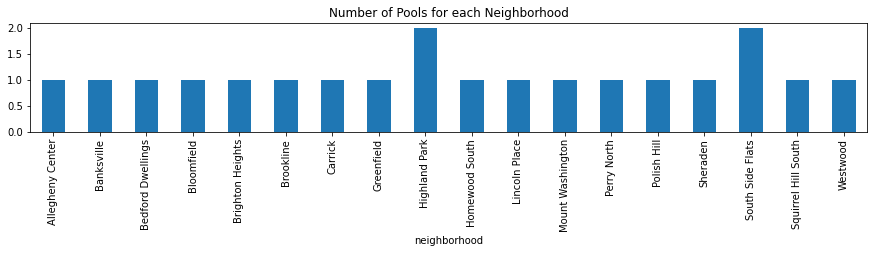

In [7]:
num_pools = pools.groupby('neighborhood')['name'].count()
num_pools.plot.bar(title="Number of Pools for each Neighborhood",  x="neighborhood",figsize=(15,2))

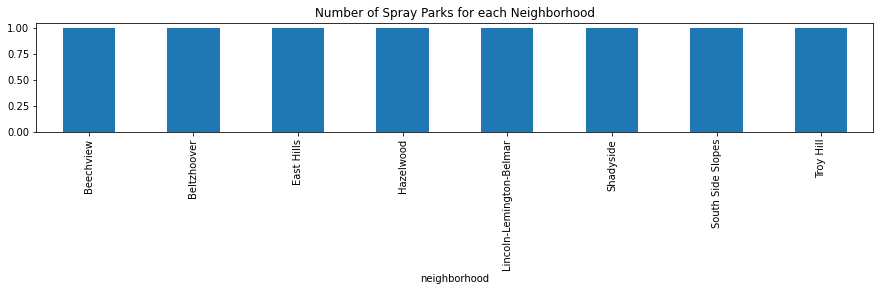

In [8]:
num_sprayparks = sprayparks.groupby('neighborhood')['name'].count()
num_sprayparks.plot.bar(title="Number of Spray Parks for each Neighborhood", x="neighborhood", figsize=(15,2))

Finally, we generate our metric. We multiply the number of spray parks by the ratio of pools to spray parks to account for their rareness.



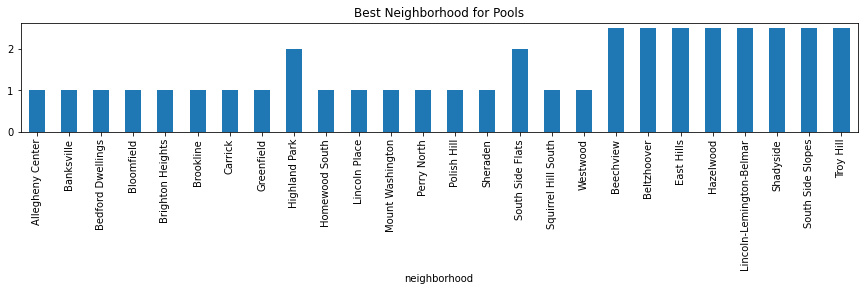

In [9]:
# Valuing spray parks higher in the metric given they are rarer
num_sprayparks = num_sprayparks * (len(pools)/len(sprayparks))

# The two datasets are concatenated, not merged, because their is no overlap between neighborhoods with pools and neighborhoods with spray parks
metric = pd.concat([num_pools, num_sprayparks])

metric.plot.bar(title="Best Neighborhood for Pools", x="neighborhood", figsize=(15,2))

In [10]:
metric.sort_values()

neighborhood
Allegheny Center            1.0
Westwood                    1.0
Squirrel Hill South         1.0
Sheraden                    1.0
Polish Hill                 1.0
Mount Washington            1.0
Lincoln Place               1.0
Homewood South              1.0
Perry North                 1.0
Greenfield                  1.0
Bedford Dwellings           1.0
Bloomfield                  1.0
Brighton Heights            1.0
Banksville                  1.0
Brookline                   1.0
Carrick                     1.0
South Side Flats            2.0
Highland Park               2.0
Beechview                   2.5
Beltzhoover                 2.5
East Hills                  2.5
Hazelwood                   2.5
Lincoln-Lemington-Belmar    2.5
Shadyside                   2.5
South Side Slopes           2.5
Troy Hill                   2.5
Name: name, dtype: float64

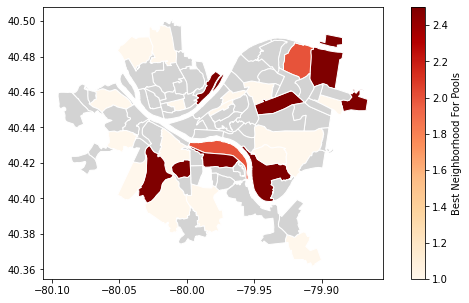

In [12]:
# Import neighborhood geometry data
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

# merge our metric data with the geometry
metric = neighborhoods.merge(metric, how='left', left_on='hood', right_on='neighborhood')

# plot a map, name is the metric #
metric.plot(column="name",
            cmap='OrRd',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Best Neighborhood For Pools"}, 
               figsize=(10, 5),         
               missing_kwds={"color": "lightgrey"} 
           )
            

Next, we will explore the parks of the neighborhoods of Pitt as parks are great outdoor environments to have fun and enjoy the neighborhood. 

# Submetric - Parks


A key component to fun in a neighborhood is the availabilty and quality of public zones dedicated to fun - i.e. parks. Using a combination of a datasets on parks, I will develop a metric for determining the best neighborhood for parks in Pittsburgh.

## Metric

The best neighborhood for parks depends on two factors, the number of parks in a neighborhood and the total area of parks. Each is valuable because it determines how many parks are available for use as well as how much space is available. We will multiply these two factors to generate our metric.

## Analysis

First we import pandas and import our data.


In [13]:
# import pandas
import pandas as pd
import geopandas as gp
%matplotlib inline

# import our datasets
parks = pd.read_csv("parks.csv")
parks2 = pd.read_csv("parks2.csv")

The first parks dataset includes data on the dimensions of the park.


In [14]:
parks.sample(5)


,objectid_1,objectid,acreage,sqft,final_cat,type,sector,origpkname,updatepknm,alterntnam,...,globalid,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,globalid_1,shape_area,shape_length
26,1228,34,7.043431,306810.614843,Neighborhood Park,NP,11,Chadwick Rec Center,Chadwick Park,Chadwick Park,...,ad00f128-3d9f-4bfd-93e9-98fe0d4241a4,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Northeast,7.043431,a4146660-a654-4d7a-96fb-257bad073721,49302.011719,1009.731759
89,1291,169,0.412195,17955.138677,Special Use Park,SU,7,Southside Market House,Southside Market House,Southside Market House,...,9bb8fe4a-a3ba-49ba-a3b3-bd099243b04e,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Southern,0.412195,6c505a59-2a1d-48be-a5a7-fbf426307e4d,2882.171875,216.214235
138,1340,124,0.605921,26393.821697,Beautification Site,BTF,11,McPherson Blvd Strip,McPherson Blvd Strip,McPherson Blvd Strip,...,7b7961f7-5e49-410f-a46c-cb27d41465fc,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Eastern,0.605921,2b2295f0-fe0f-487d-9add-86a51c8c6878,4239.945312,968.222265
49,1251,42,0.280366,12212.704519,Neighborhood Park,NP,2,Cross & Strauss Parklet,Cross and Strauss Park,Cross and Strauss Park,...,f9c675a5-8da5-4e06-a308-2cf81ad5cc8f,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Northern,0.280366,384fea4c-7b17-47c2-9ab9-7a331e1d923f,1962.460938,180.872347
32,1234,24,0.779470,33953.560769,Neighborhood Park,NP,6,Bon Air Tot Lot,Bon Air Park,Bon Air Park,...,48c76f2a-fc5c-4ed8-9ab0-465403a64d69,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,pgh.dcp.allisot,2022-08-24T16:53:03.812000+00:00,Parks - Southern,0.779470,f30f2b55-89c5-4eb7-a5d4-f2581aa7233b,5446.730469,328.006053


Not all of the entries in this dataset are parks, and we don't need all of these columns.


In [15]:
# filter out only the entries that describe a park
parks = parks.loc[parks['final_cat'].str.contains("Park")]

# strip the columns down to just the park name and the acreage
parks = parks[['updatepknm','acreage']]

parks.sample(5)

,updatepknm,acreage
124,Sheraden Healthy Active Living Center,0.853288
0,August Wilson Park,0.959034
2,Roland Lockridge Community Park,0.468682
114,Saline Street Green Space,0.562012
197,Fairhaven Park,39.437957


Now that we have the acreage for each park, we need to know which neighborhood each park is in. However, the first parks dataset does not include which neighborhood each park is in. That's where the parks2 datasets comes in handy.

In [16]:
parks2.sample(5)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
172,1768633106,Spring Garden Park,Park,Parks - Northern,NaN,Spring Garden,1,24,42003241200,1,24,1,1-24,40.465675,-79.985769
26,1591249432,Brighton Heights Park,Park,Parks - Northern,NaN,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.485600,-80.029606
72,809676292,Four Mile Run Park,Park,Parks - Schenley,NaN,Greenfield,5,15,42003151600,3,15,4,2-12,40.427551,-79.949468
76,984641225,Frazier Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,South Oakland,3,4,42003040900,3,4,4,2-11,40.429303,-79.954803
37,2113503545,Cowley Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458690,-79.988924


This dataset has a few columns we don't need, so let's strip it down.



In [17]:
parks2 = parks2[['name','neighborhood']]
parks2.sample(5)

,name,neighborhood
134,Morrow Triangle Park,Bloomfield
131,Monongahela Park,South Side Slopes
132,Monongahela Wharf Landing Park,Central Business District
155,Regent Square War Memorial,Regent Square
1,Albert Turk Graham Park,Crawford-Roberts


Now we will combine the two datasets so we know which neighborhood each park is in as well as it's acreage.




In [18]:
# the park name columns need to have the same name to merge
parks = parks.rename(columns={'updatepknm':'name'})

# merges the data
parks = pd.merge(parks,parks2,how="left", on='name')
parks.sample(5)

,name,acreage,neighborhood
57,Winters Park,2.454248,South Side Slopes
47,Brighton Heights Park,30.995308,Brighton Heights
5,Emerald View Park - Eileen McCoy Park,0.853850,Duquesne Heights
97,Southside Park,57.311350,South Side Slopes
21,Tuxedo Street Skate Park,1.053451,Sheraden


Here we visualize the size of each park:



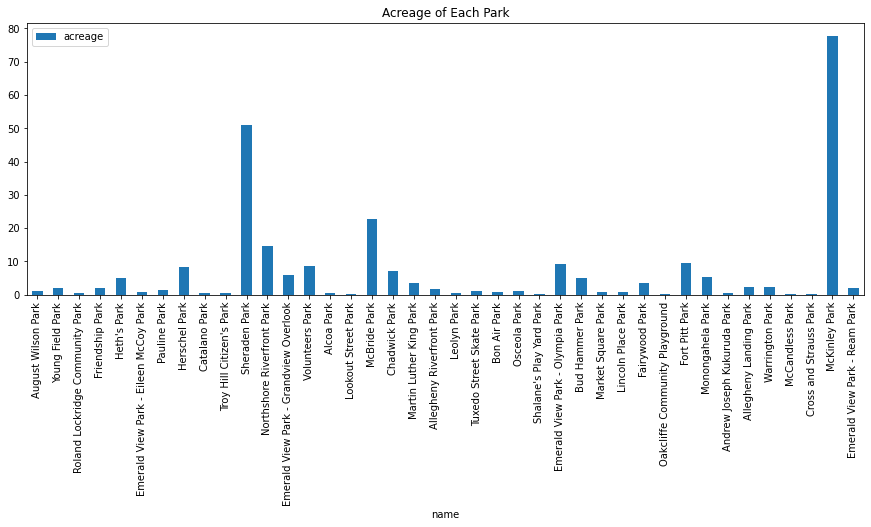

In [19]:
parks.head(40).plot.bar(x='name',title="Acreage of Each Park", figsize=(15,5))


Next we will sum up the acreage of the parks for each neighborhood.



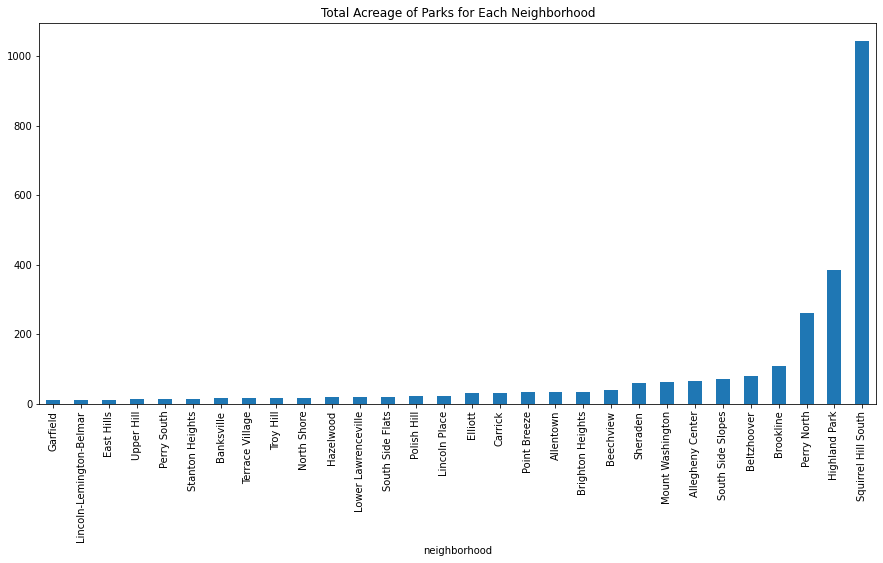

In [20]:
total_acreage = parks.groupby('neighborhood')['acreage'].sum()
total_acreage.sort_values().tail(30).plot.bar(title="Total Acreage of Parks for Each Neighborhood", figsize=(15,7))

Then we count the number of parks per neighborhood.

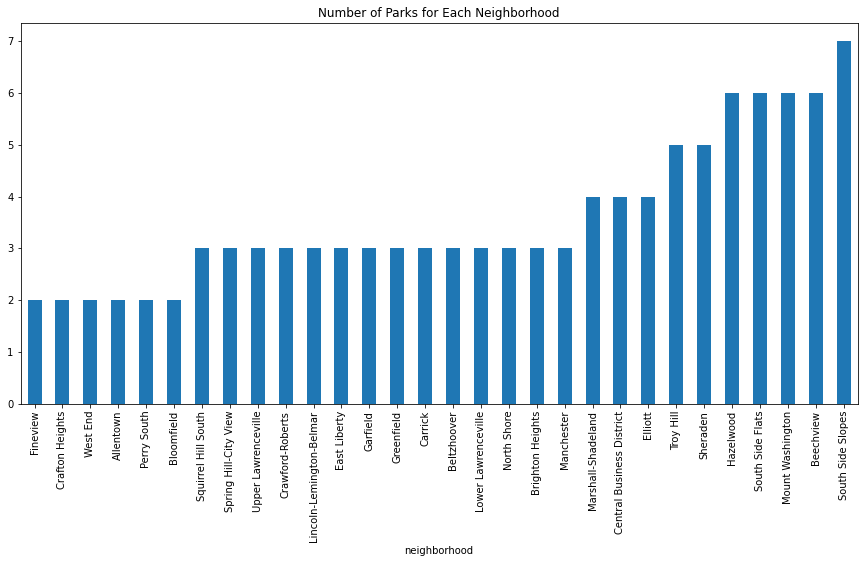

In [21]:
num_of_parks = parks.groupby('neighborhood')['name'].count()
num_of_parks.sort_values().tail(30).plot.bar(title="Number of Parks for Each Neighborhood", figsize=(15,7))

Finally, we generate our metric by multiplying these two values.



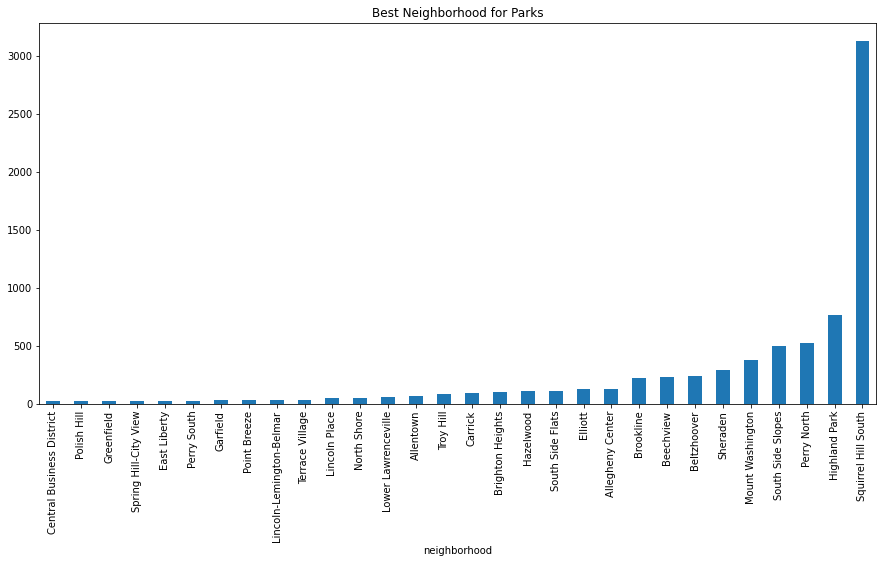

In [22]:
metric = (num_of_parks * total_acreage)
metric.sort_values().tail(30).plot.bar(title="Best Neighborhood for Parks", figsize=(15,7))

In [23]:
metric.sort_values()

neighborhood
West Oakland              0.053646
Bluff                     0.108286
Esplen                    0.132588
Westwood                  0.344124
Homewood West             0.428525
                          ...     
Mount Washington        378.294610
South Side Slopes       498.721701
Perry North             520.405507
Highland Park           766.037293
Squirrel Hill South    3126.670986
Length: 71, dtype: float64

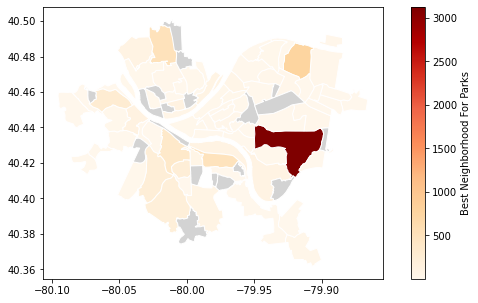

In [24]:
# Import neighborhood geometry data
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

# merge our metric data with the geometry
metric.name = "metric"
metric = neighborhoods.merge(metric, how='left', left_on='hood', right_on='neighborhood')

# plot a map, "metric" is the metric #
metric.plot(column="metric",
            cmap='OrRd',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Best Neighborhood For Parks"}, 
               figsize=(10, 5),         
               missing_kwds={"color": "lightgrey"} 
           )

Finally, we can analyzed the courts and fields in the neighborhoods of Pittsburgh:

# Submetric - Courts

Having a communities without courts and fields to play sport on is just a bummer. That's why we decided it was only right to measure a variety of courts from basketball courts to tennis courts. With a variety of activities, the community is always fun.

## Metric

Since there are variety of combinations of courts a neighborhood can have, there are so many ways you could evaluate the datasets of courts. We decided on measuring the diversification of courts and frequency of courts. We combined these values to determine the neighborhood with the most fun. 

## Analysis

First we import pandas, numpy, and matplotlib data as tools in case we need them.



In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import dataset:

In [2]:
#read in files
courts = pd.read_csv("courts&rinks.csv")
courts.head(100)

,id,name,type,park,location,surface_material,grandstand,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1592343416,Allegheny Commons Basketball Court 1,Basketball (Full),Allegheny Commons,NaN,NaN,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454443,-80.008104
1,1365248699,Allegheny Commons Park Tennis Court 1,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452400,-80.012531
2,1757180821,Allegheny Commons Park Tennis Court 2,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452238,-80.012150
3,744303307,Allegheny Commons Park Tennis Court 3,Tennis,Allegheny Commons,NaN,Asphalt,0,f,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.452075,-80.011767
4,1157777481,Alton Park Basketball Court 1,Basketball (Half),Alton Park,NaN,Asphalt,0,f,Beechview,4,19,42003191600,5,19,6,4-28,40.414152,-80.022305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1271269929,Highland Park Flynn Parklet Basketball Court 1,Basketball (Half),Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478829,-79.918815
96,63568209,Highland Park Flynn Parklet Basketball Court 2,Basketball (Half),Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478763,-79.918631
97,1563856270,Highland Park Flynn Parklet Hockey Court 1,Street Hockey,Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.478650,-79.918818
98,396643617,Highland Park Flynn Parklet Tennis Court 1,Tennis,Highland Park,NaN,Asphalt,0,f,Highland Park,7,11,42003110200,2,11,5,3-9,40.479078,-79.918682


Counting unique aspects with respect to each neighborhood:

In [4]:
courts.groupby("neighborhood").count()

,id,name,type,park,location,surface_material,grandstand,inactive,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,9,9,9,9,0,4,9,8,9,9,9,9,9,9,9,9,9
Allentown,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Banksville,3,3,3,3,0,3,3,3,3,3,3,3,3,3,3,3,3
Bedford Dwellings,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2
Beechview,7,7,7,7,0,7,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Terrace Village,5,5,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5
Troy Hill,8,8,8,8,0,8,8,3,8,8,8,8,8,8,8,8,8
Upper Hill,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1


Analyze the frequency of the unique courts:

In [3]:
occurenceOfCourtType = courts.groupby(['type']).size().sort_values(ascending=True)

display(occurenceOfCourtType)

type
Horseshoe Pit         2
Lawn Bowling          2
Dek Hockey            5
Volleyball            5
General Sports        6
Bocce                 8
Street Hockey         8
Pickleball           12
Hockey               14
Basketball (Half)    23
Tennis               73
Basketball (Full)    88
dtype: int64

Full Basketball courts are the most frequent in neighborhoods

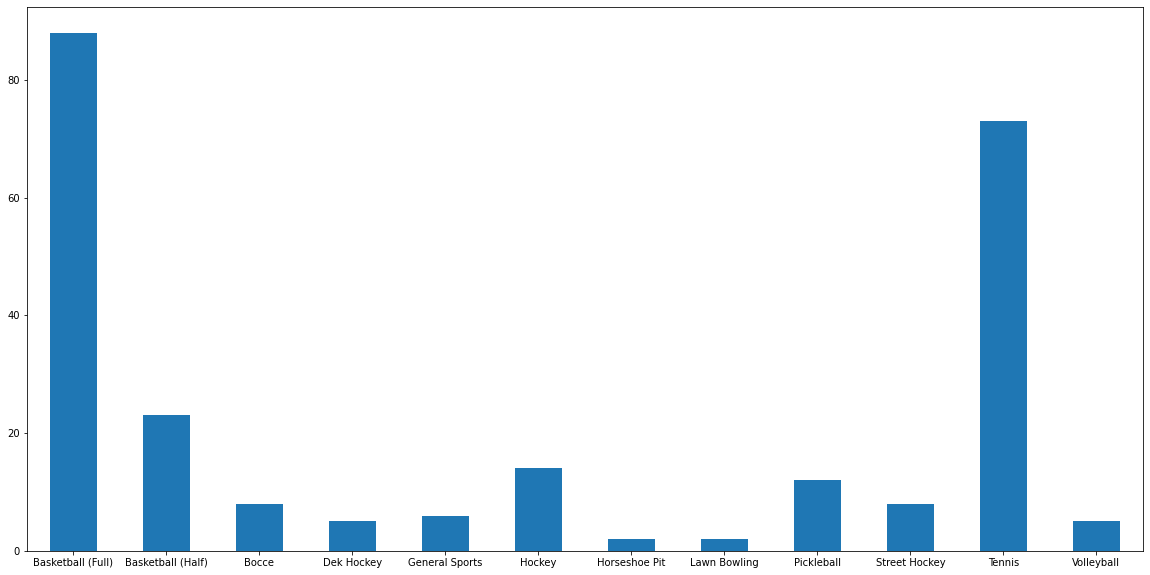

In [6]:
courts["type"].value_counts().sort_index().plot(kind='bar', rot=0, figsize = (20, 10))

Basketball (Full) is the most built court so it is probably also the most popular among users.

Now we create a totally new dataframe examining only neighborhoods and the specific types of courts to analyze diversity of courts.

In [8]:
df_new = courts[['neighborhood', 'type']]
df_new

,neighborhood,type
0,Allegheny Center,Basketball (Full)
1,Allegheny Center,Tennis
2,Allegheny Center,Tennis
3,Allegheny Center,Tennis
4,Beechview,Basketball (Half)
...,...,...
241,Perry North,Tennis
242,Elliott,Basketball (Half)
243,Squirrel Hill South,Pickleball
244,Squirrel Hill South,Pickleball


Figure out how many unique courts there are:

In [10]:
df_new.groupby("type").nunique().count()

neighborhood    12
dtype: int64

Analyze which neighborhood has the most unique courts.

In [12]:
df_new.groupby("neighborhood")['type'].nunique().sort_values(ascending=True)

neighborhood
Lincoln-Lemington-Belmar    1
Homewood West               1
Larimer                     1
Marshall-Shadeland          1
Middle Hill                 1
                           ..
Hazelwood                   4
Allegheny Center            4
Brookline                   5
Highland Park               5
Squirrel Hill South         6
Name: type, Length: 63, dtype: int64

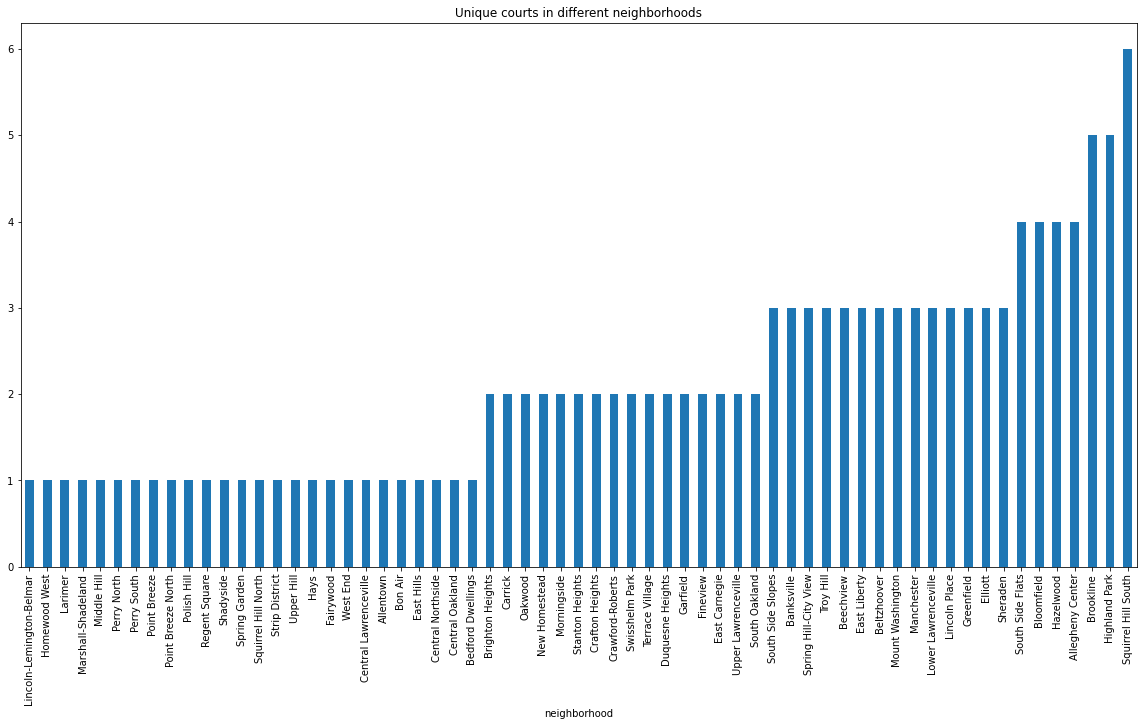

In [13]:
UNIQUE = df_new.groupby("neighborhood")['type'].nunique().sort_values(ascending=True)
UNIQUE.plot(kind='bar', figsize = (20, 10), title='Unique courts in different neighborhoods')

Conclusion: Squirrel Hill South has the most unique courts.

Determine frequency of courts:

In [15]:
FREQUENCY = df_new.groupby("neighborhood")['type'].count().sort_values(ascending=True)
FREQUENCY

neighborhood
Polish Hill             1
Larimer                 1
Marshall-Shadeland      1
Middle Hill             1
Perry South             1
                       ..
Brookline               9
Beltzhoover             9
Hazelwood              10
Highland Park          20
Squirrel Hill South    26
Name: type, Length: 63, dtype: int64

Graph Frequencies and show diversity of courts on graph

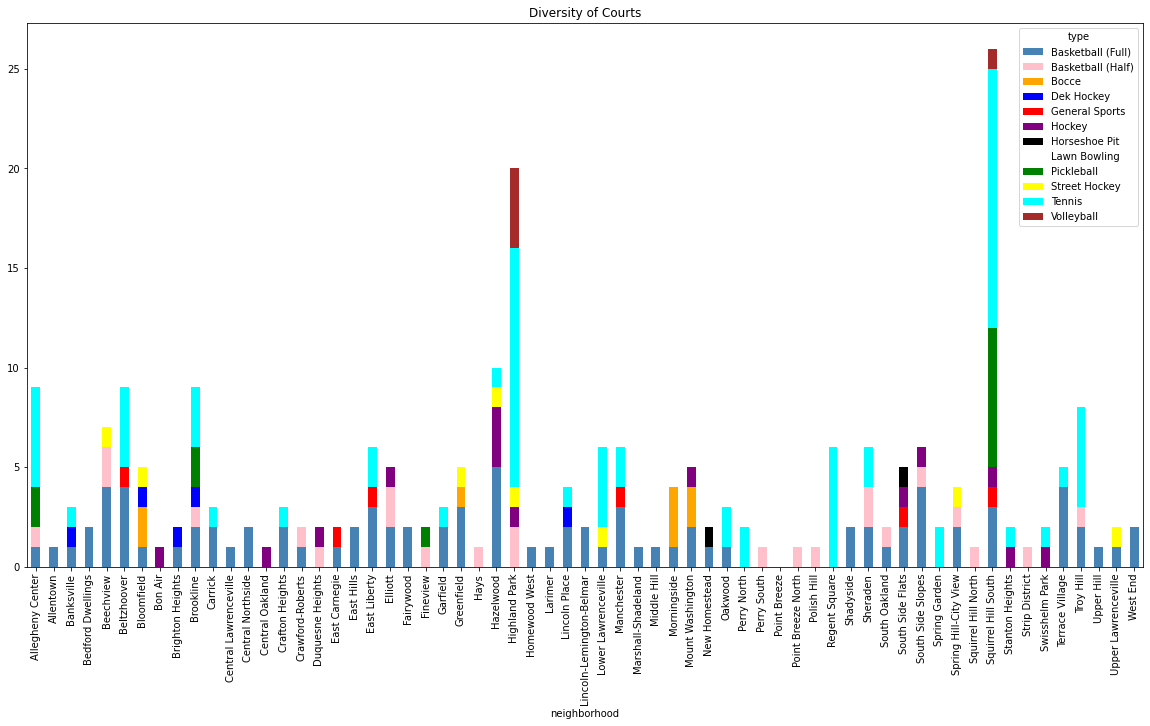

In [16]:
df_new.groupby(['neighborhood', 'type']).size().unstack().plot(kind='bar', stacked=True, rot=90, figsize = (20, 10), color=['steelblue','pink','orange','blue','red','purple','black','w','green','yellow','cyan','brown'], title='Diversity of Courts')


Figure out which neighborhood has the most full basketball courts as they are built the most:

In [18]:
bbfcourts = df_new.loc[df_new['type']=='Basketball (Full)']
FULL_BB_COURTS = bbfcourts.groupby("neighborhood").count().sort_values(ascending=True, by='type')
FULL_BB_COURTS

,type
neighborhood,
Allegheny Center,1
Upper Hill,1
South Oakland,1
Oakwood,1
New Homestead,1
Morningside,1
Middle Hill,1
Marshall-Shadeland,1
Lower Lawrenceville,1


Ahh! Hazelwood does!

Here's a graph of the the frequencies of full basketball courts

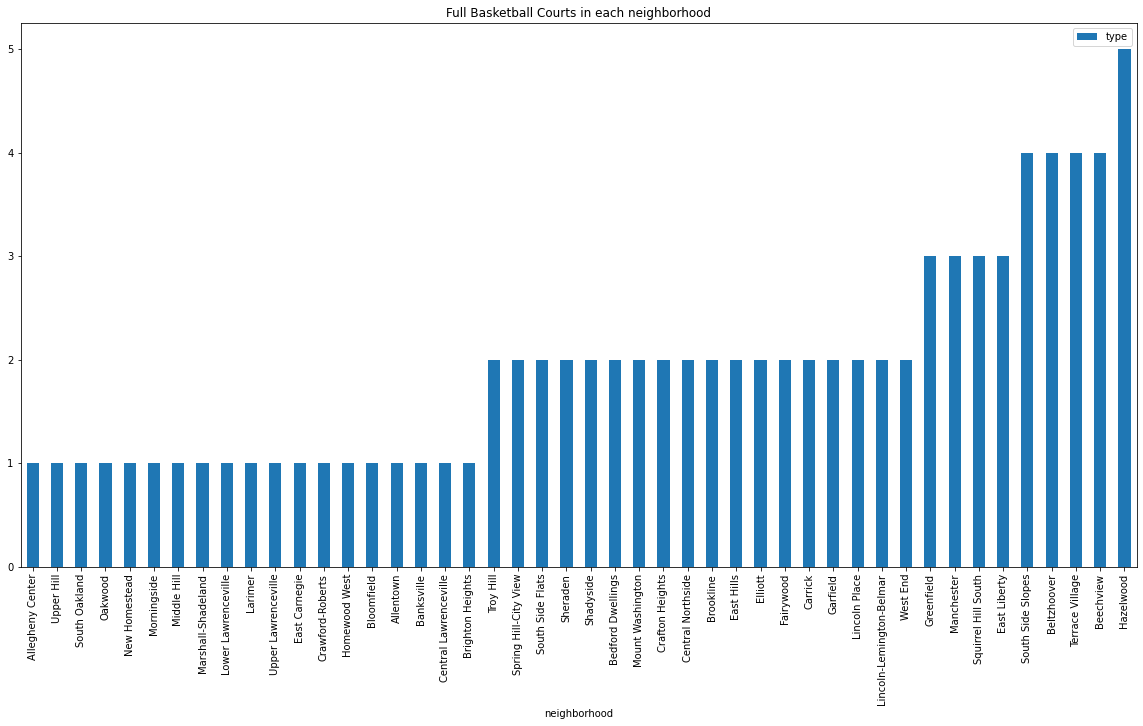

In [20]:
FULL_BB_COURTS.plot(kind='bar', figsize = (20, 10), title="Full Basketball Courts in each neighborhood")

In [ ]:
Now we must find the average of 'UNIQUE','FREQUENCY','FULL_BB_COURTS' by add them up and dividing by three

In [ ]:
metric = pd.concat(['UNIQUE','FREQUENCY','FULL_BB_COURTS'], axis=1)